In [232]:
import numpy as np

from utils import get_random_data, get_normal_data, get_local_mse_fmse_C
from shapley import shapley_values
from graphs import plot_corr

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Scalar Mean Estimation Example

## Scalar Mean Estimation random means

In [233]:
N = 20
num_iters = 20
utility_type = "inverse"
if utility_type == "linear":
    utility = lambda x: -x
elif utility_type == "inverse":
    utility = lambda x: 1 / (1 + x)
else:
    raise NotImplementedError
added_cost = 1e-4
data_type = "uniform"
if data_type == "uniform":
    get_data = get_random_data
elif data_type == "normal":
    get_data = get_normal_data
else:
    raise NotImplementedError

In [234]:
def get_results(N, num_iters, utility, get_data):
    
    exp_gains = []
    exp_fair_gains = []
    exp_fair_gains_cost = []
    exp_task_difficulty = []
    exp_task_mean = []
    exp_contributions = []
    exp_shapley = []

    for i in range(num_iters):
        mus, sigmas, num_samples = get_data(N=N)
        local_mse, mtl_mse, fair_mse, contribution = get_local_mse_fmse_C(mus, sigmas, num_samples)
        gains = utility(mtl_mse) - utility(local_mse)
        fair_gains = utility(fair_mse) - utility(local_mse)
        shapley = shapley_values(N, mus, sigmas, num_samples, utility)
        
        exp_gains.append(gains)
        exp_fair_gains.append(fair_gains)
        exp_fair_gains_cost.append(fair_gains - added_cost)
        exp_task_difficulty.append(local_mse)
        exp_task_mean.append(mus)
        exp_contributions.append(contribution)
        exp_shapley.append(shapley)
        
    return exp_gains, exp_fair_gains, exp_fair_gains_cost, exp_task_difficulty, exp_task_mean, exp_contributions, exp_shapley

exp_gains, exp_fair_gains, exp_fair_gains_cost, exp_task_difficulty, exp_task_mean, exp_contributions, exp_shapley = get_results(N, num_iters, utility, get_data)

Shapley value computation Progress:   0%|          | 0/10485720 [00:00<?, ?it/s]

Shapley value computation Progress:   0%|          | 0/10485720 [00:00<?, ?it/s]

Shapley value computation Progress:   0%|          | 0/10485720 [00:00<?, ?it/s]

Shapley value computation Progress:   0%|          | 0/10485720 [00:00<?, ?it/s]

Shapley value computation Progress:   0%|          | 0/10485720 [00:00<?, ?it/s]

Shapley value computation Progress:   0%|          | 0/10485720 [00:00<?, ?it/s]

Shapley value computation Progress:   0%|          | 0/10485720 [00:00<?, ?it/s]

Shapley value computation Progress:   0%|          | 0/10485720 [00:00<?, ?it/s]

Shapley value computation Progress:   0%|          | 0/10485720 [00:00<?, ?it/s]

Shapley value computation Progress:   0%|          | 0/10485720 [00:00<?, ?it/s]

Shapley value computation Progress:   0%|          | 0/10485720 [00:00<?, ?it/s]

Shapley value computation Progress:   0%|          | 0/10485720 [00:00<?, ?it/s]

Shapley value computation Progress:   0%|          | 0/10485720 [00:00<?, ?it/s]

Shapley value computation Progress:   0%|          | 0/10485720 [00:00<?, ?it/s]

Shapley value computation Progress:   0%|          | 0/10485720 [00:00<?, ?it/s]

Shapley value computation Progress:   0%|          | 0/10485720 [00:00<?, ?it/s]

Shapley value computation Progress:   0%|          | 0/10485720 [00:00<?, ?it/s]

Shapley value computation Progress:   0%|          | 0/10485720 [00:00<?, ?it/s]

Shapley value computation Progress:   0%|          | 0/10485720 [00:00<?, ?it/s]

Shapley value computation Progress:   0%|          | 0/10485720 [00:00<?, ?it/s]

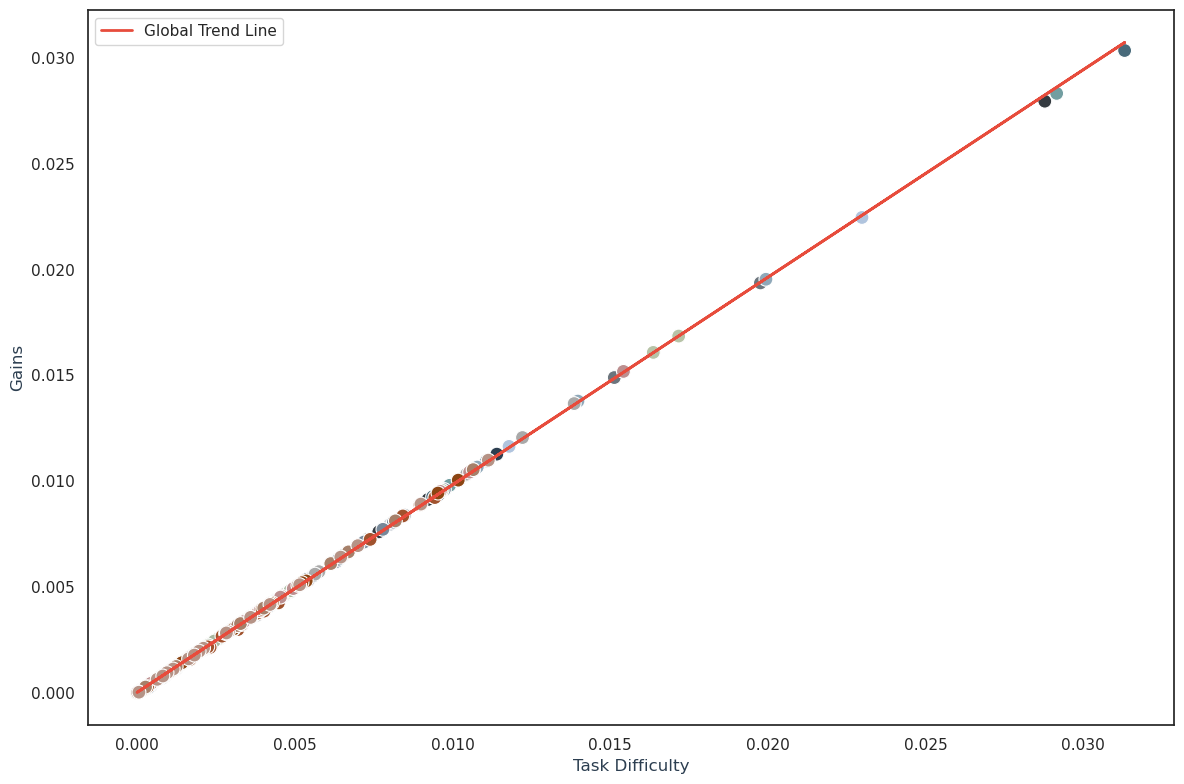

In [235]:
plot_corr(exp_task_difficulty, exp_gains, "Task Difficulty", "Gains", "", save_path=f"img/{data_type}_{utility_type}_diff_vs_gains")

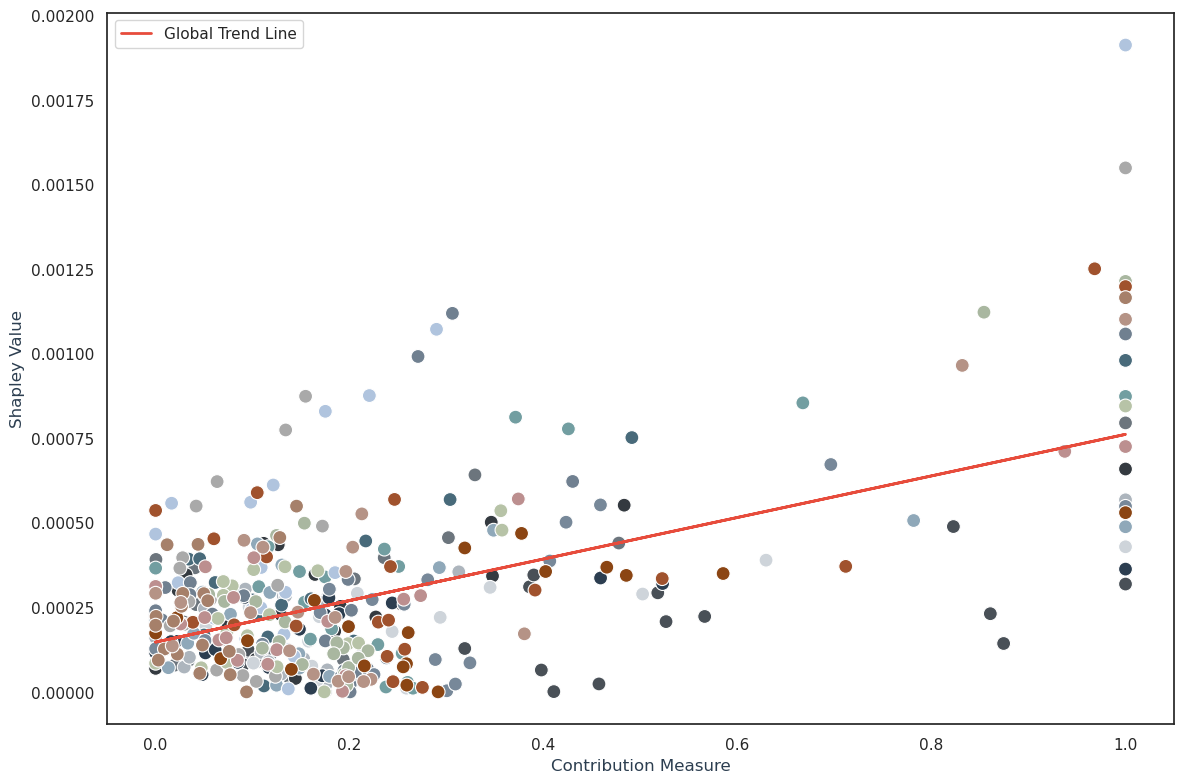

In [236]:
plot_corr(exp_contributions, exp_shapley, "Contribution Measure", "Shapley Value", "", save_path=f"img/{data_type}_{utility_type}_contr_vs_shap")

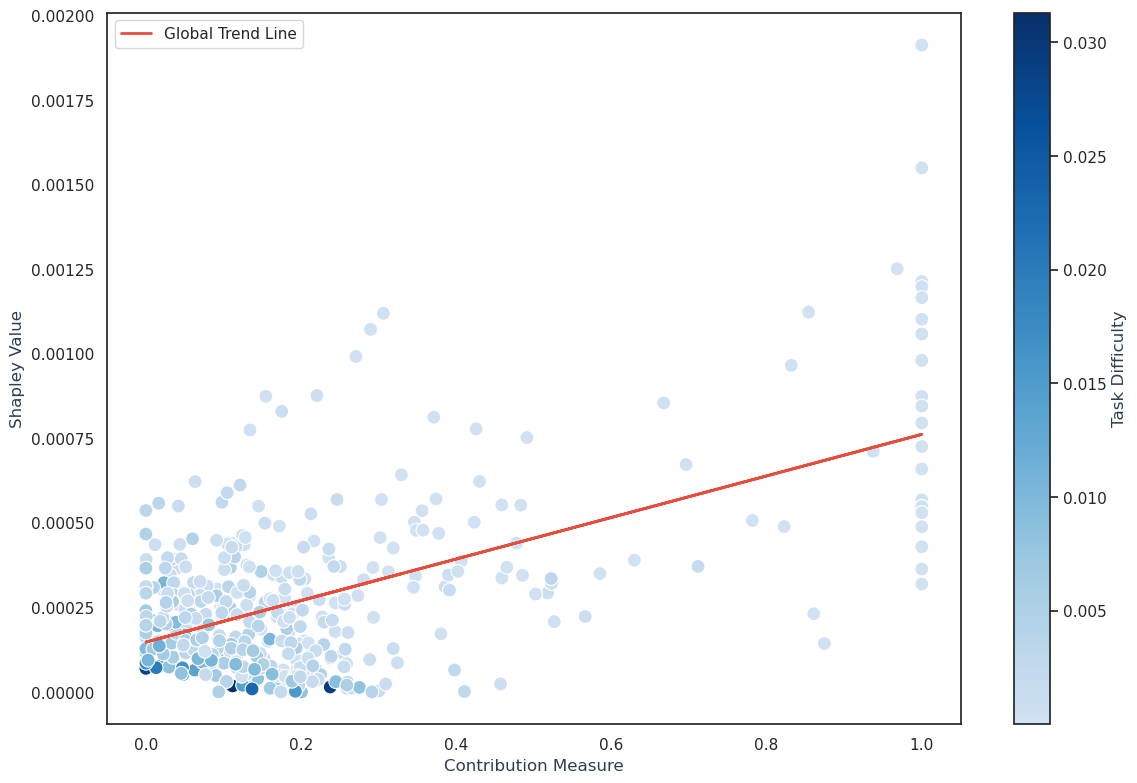

In [237]:
plot_corr(exp_contributions, exp_shapley, "Contribution Measure", "Shapley Value", "", save_path=f"img/{data_type}_{utility_type}_contr_vs_shap_w_hue_diff", hue_control=exp_task_difficulty, hue_label="Task Difficulty")

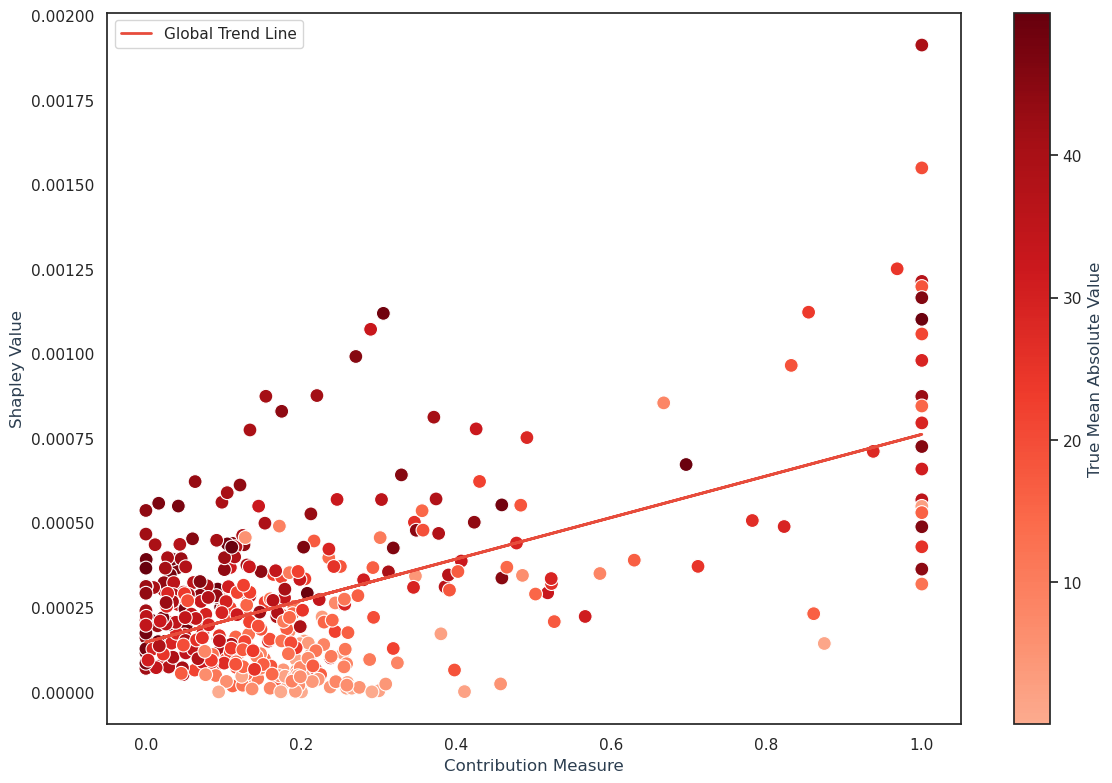

In [238]:
plot_corr(exp_contributions, exp_shapley, "Contribution Measure", "Shapley Value", "", save_path=f"img/{data_type}_{utility_type}_contr_vs_shap_w_hue_abs_mean", hue_control=[np.abs(exp_task_mean[i]) for i in range(len(exp_task_mean))], hue_label="True Mean Absolute Value")

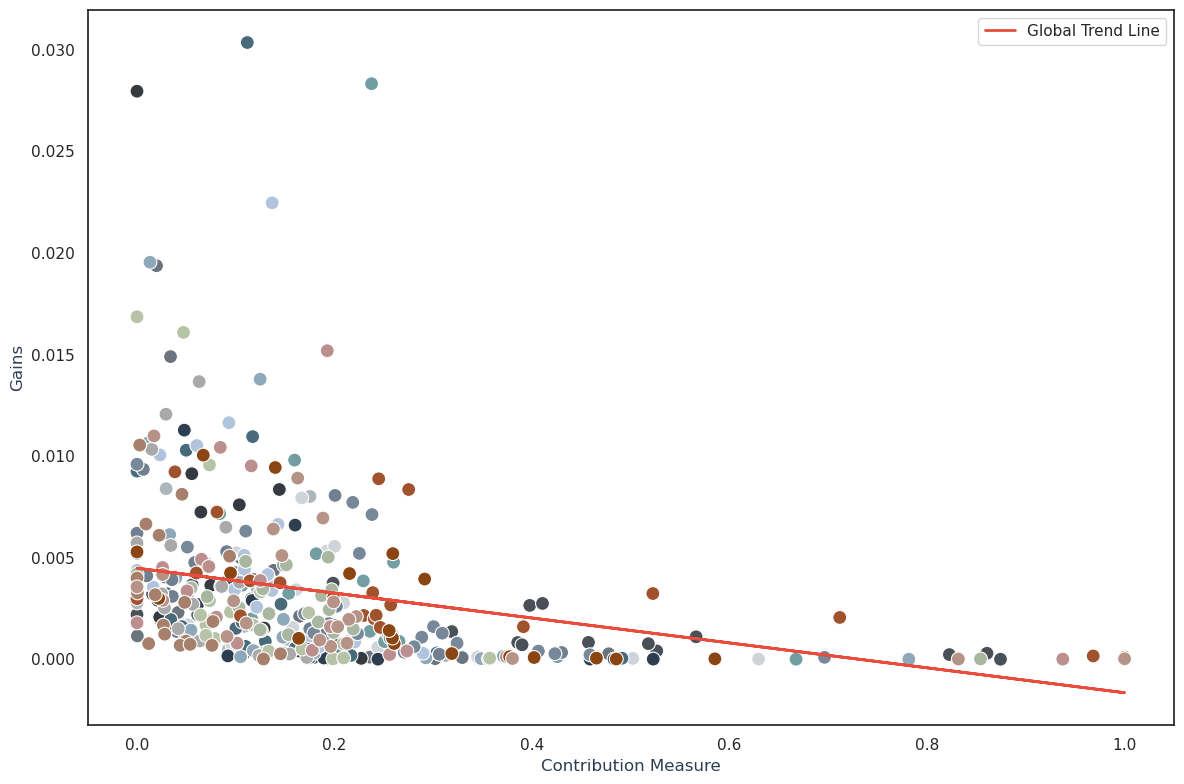

In [239]:
plot_corr(exp_contributions, exp_gains, "Contribution Measure", "Gains", "", save_path=f"img/{data_type}_{utility_type}_contr_vs_gain")

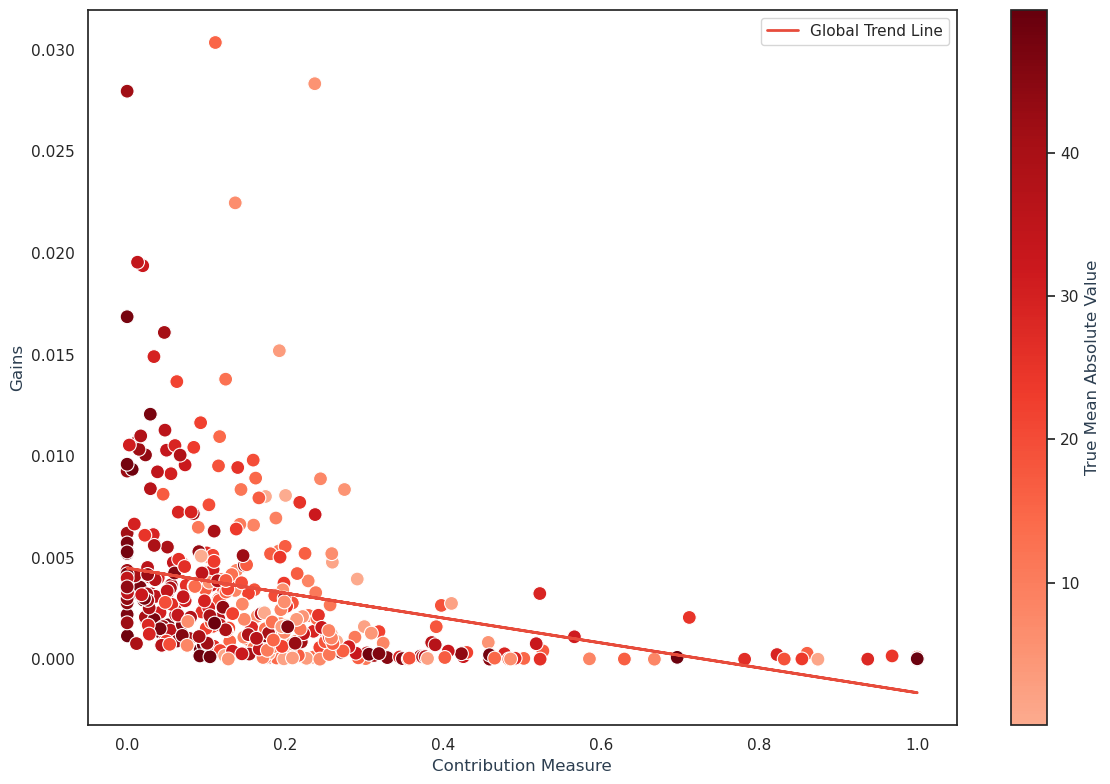

In [240]:
plot_corr(exp_contributions, exp_gains, "Contribution Measure", "Gains", "", save_path=f"img/{data_type}_{utility_type}_contr_vs_gain_w_hue_abs_mean", hue_control=[np.abs(exp_task_mean[i]) for i in range(len(exp_task_mean))], hue_label="True Mean Absolute Value")

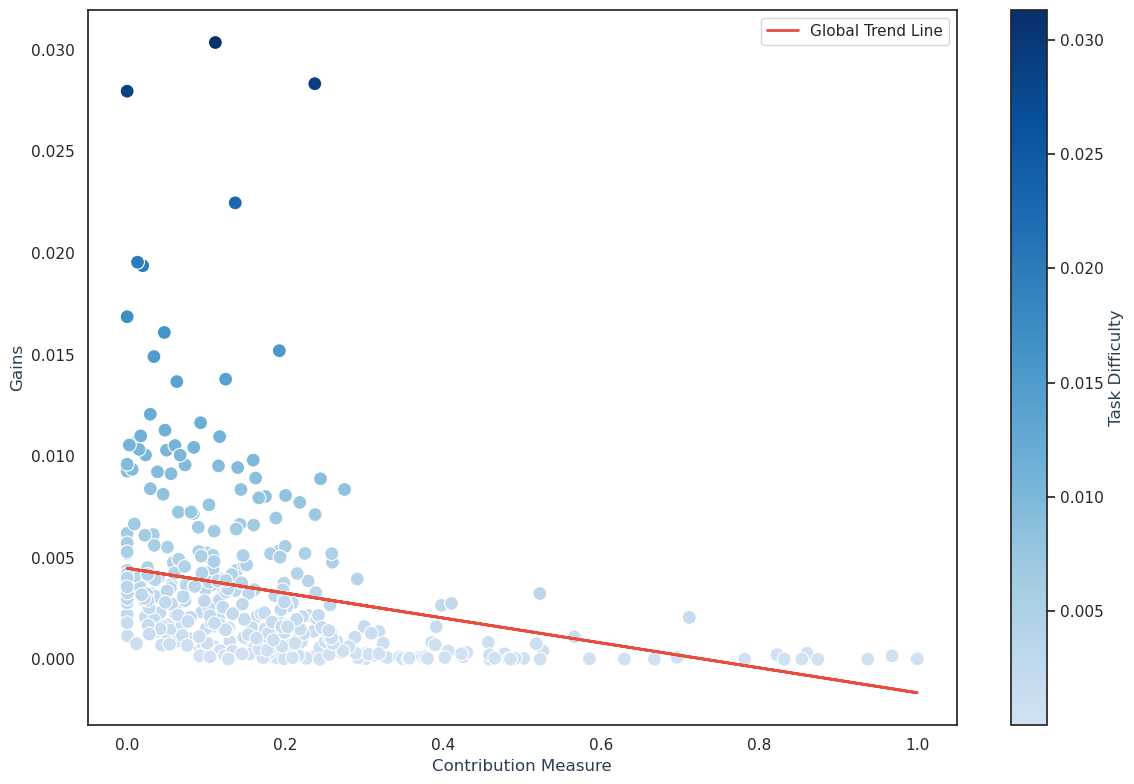

In [241]:
plot_corr(exp_contributions, exp_gains, "Contribution Measure", "Gains", "", save_path=f"img/{data_type}_{utility_type}_contr_vs_gain_w_hue_diff", hue_control=exp_task_difficulty, hue_label="Task Difficulty")

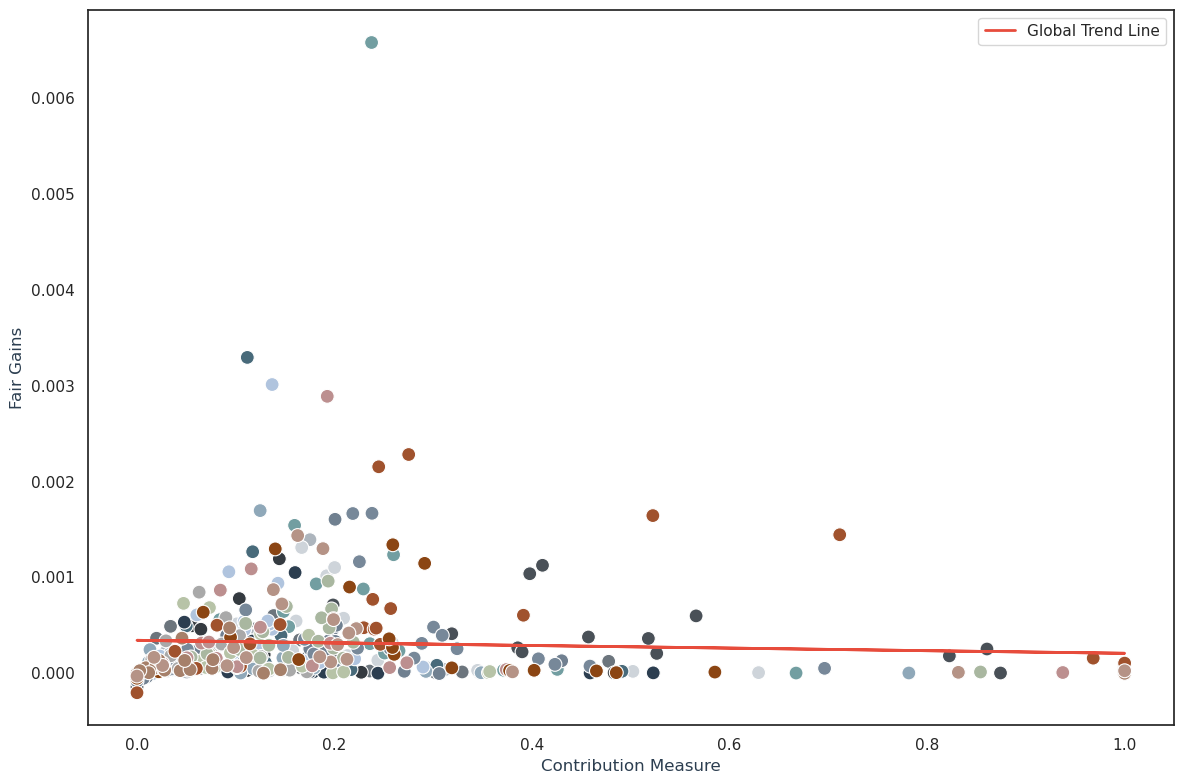

In [242]:
plot_corr(exp_contributions, exp_fair_gains, "Contribution Measure", "Fair Gains", "", save_path=f"img/{data_type}_{utility_type}_contr_vs_fair_gain")

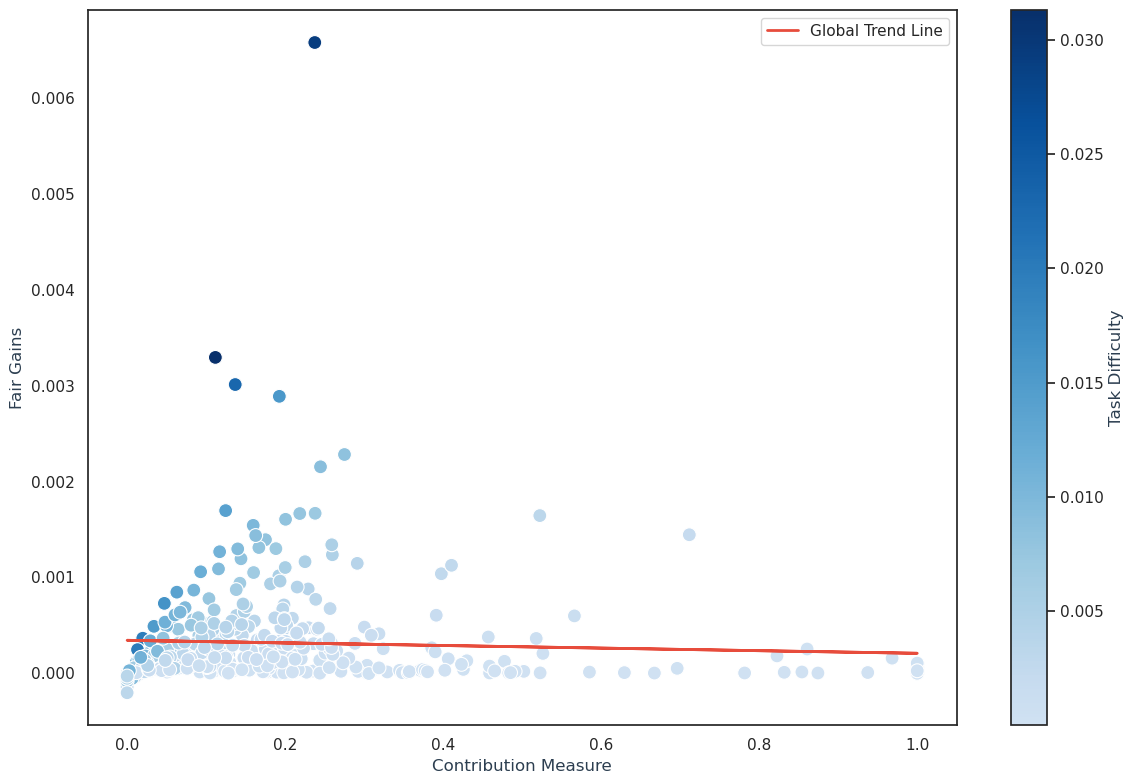

In [243]:
plot_corr(exp_contributions, exp_fair_gains, "Contribution Measure", "Fair Gains", "", save_path=f"img/{data_type}_{utility_type}_contr_vs_fair_gain_w_hue_diff", hue_control=exp_task_difficulty, hue_label="Task Difficulty")

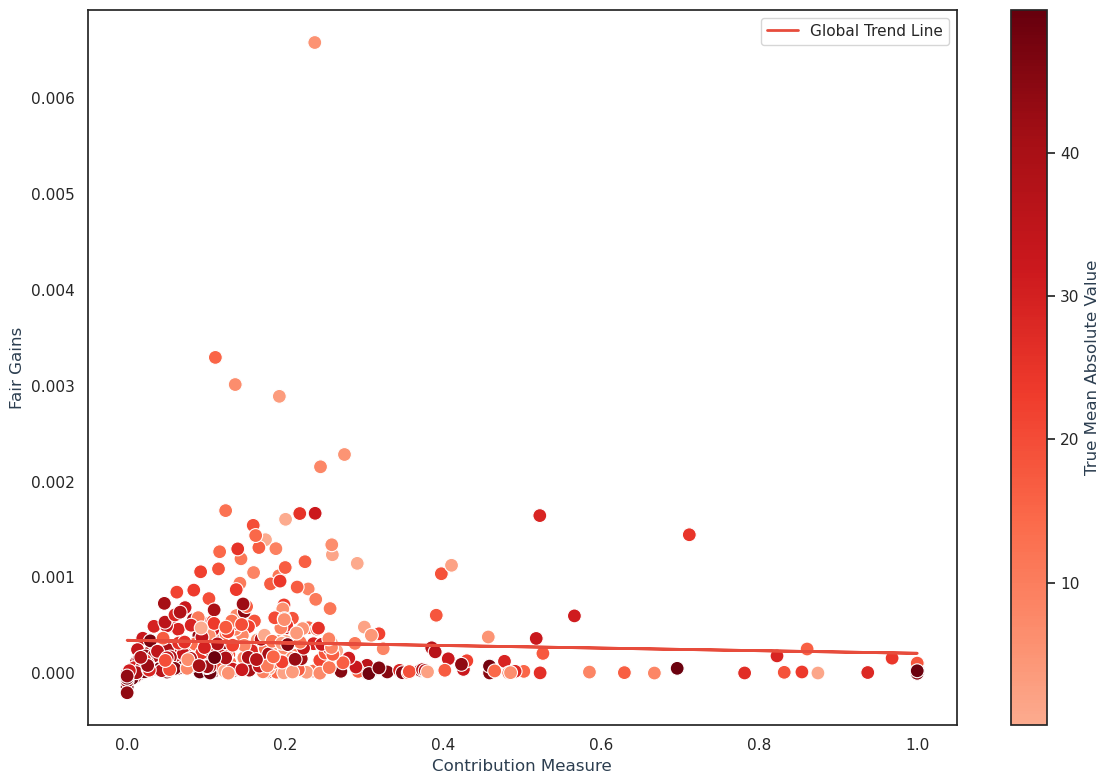

In [244]:
plot_corr(exp_contributions, exp_fair_gains, "Contribution Measure", "Fair Gains", "", save_path=f"img/{data_type}_{utility_type}_contr_vs_fair_gain_w_hue_abs_mean", hue_control=[np.abs(exp_task_mean[i]) for i in range(len(exp_task_mean))], hue_label="True Mean Absolute Value")

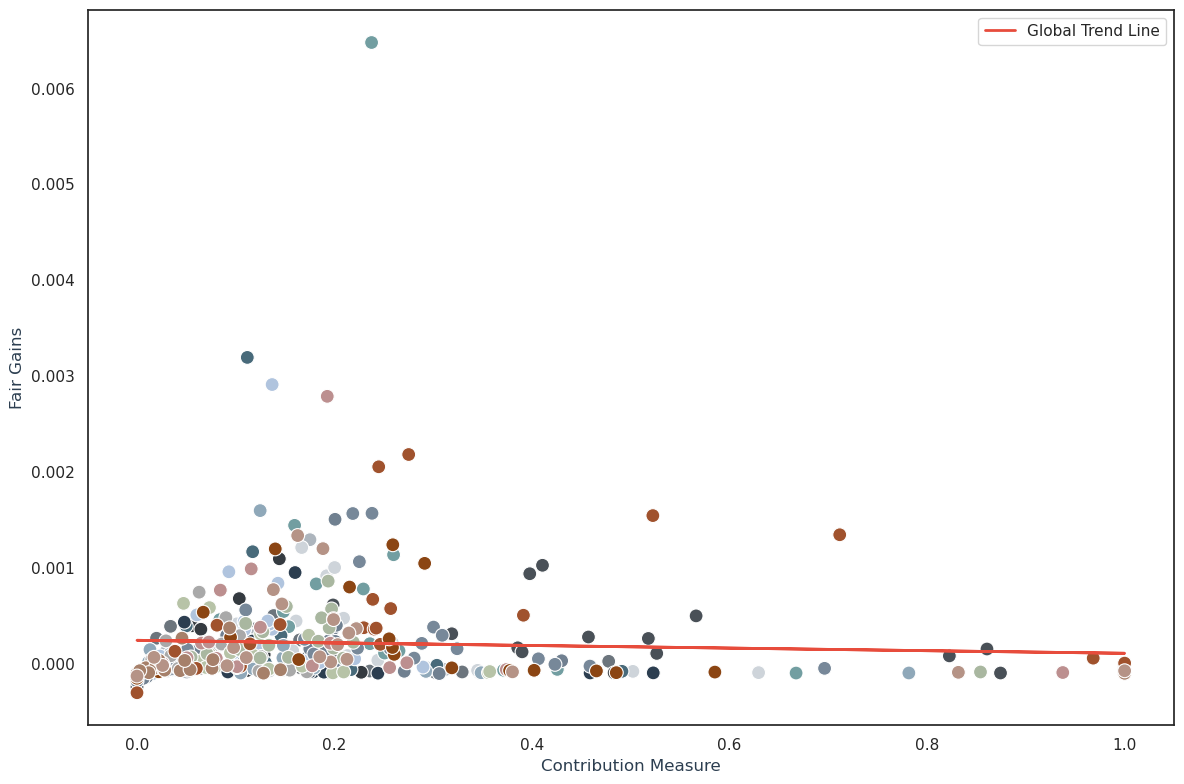

In [245]:
plot_corr(exp_contributions, exp_fair_gains_cost, "Contribution Measure", "Fair Gains", "", save_path=f"img/{data_type}_{utility_type}_contr_vs_fair_gain_cost")

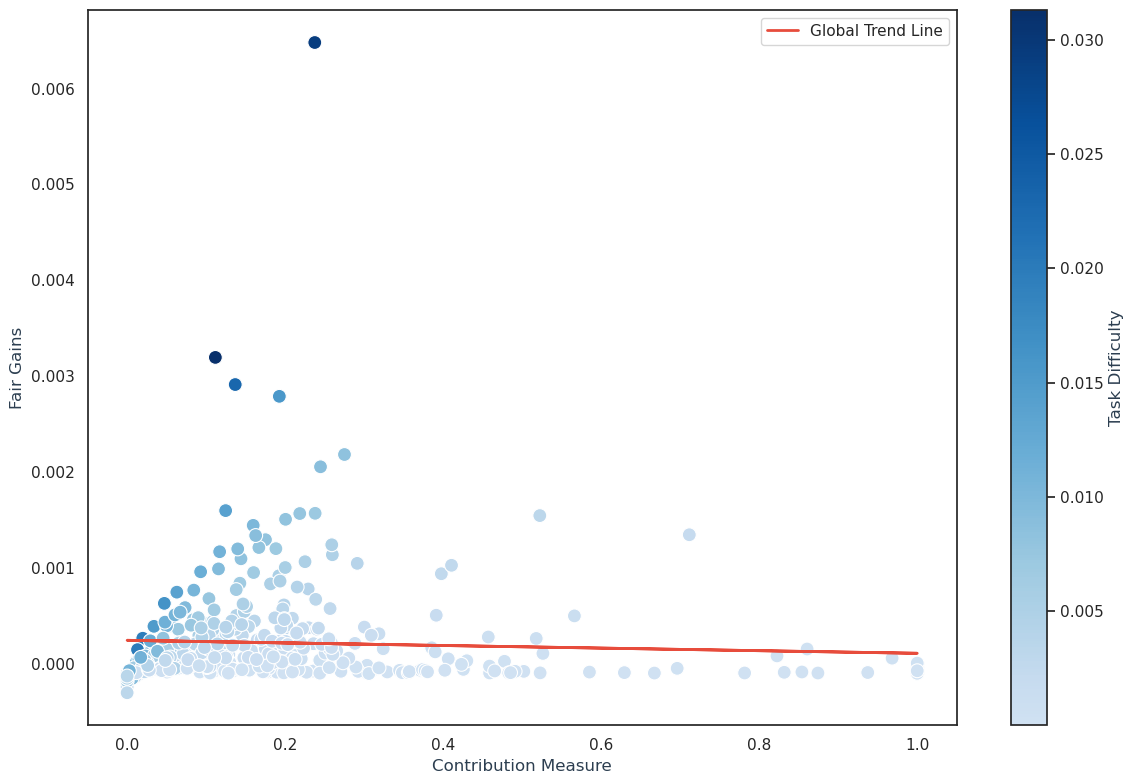

In [246]:
plot_corr(exp_contributions, exp_fair_gains_cost, "Contribution Measure", "Fair Gains", "", save_path=f"img/{data_type}_{utility_type}_contr_vs_fair_gain_cost_w_hue_diff", hue_control=exp_task_difficulty, hue_label="Task Difficulty")

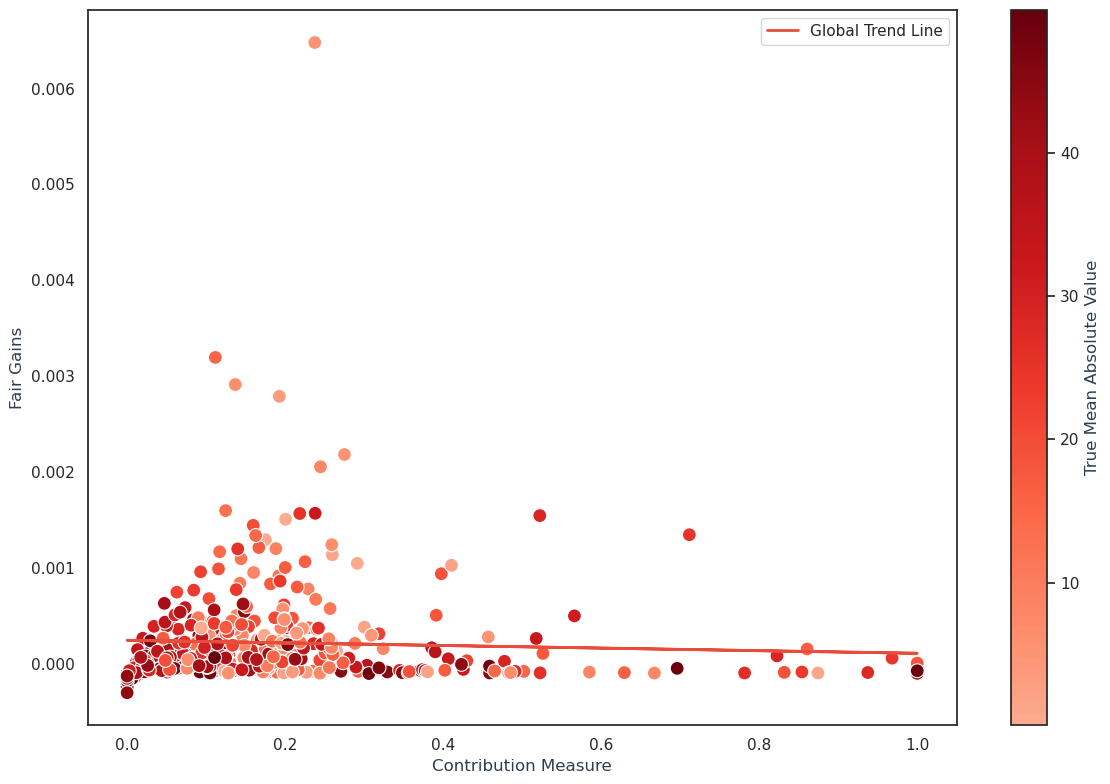

In [247]:
plot_corr(exp_contributions, exp_fair_gains_cost, "Contribution Measure", "Fair Gains", "", save_path=f"img/{data_type}_{utility_type}_contr_vs_fair_gain_cost_w_hue_abs_mean", hue_control=[np.abs(exp_task_mean[i]) for i in range(len(exp_task_mean))], hue_label="True Mean Absolute Value")